# Data Mining in Physics - Exercise 2. - DAGUR : p168 / 7

## Exercise
#### "*Annotate the code that gives panels B and D of Figure 5.3, explaining what each function does, and what the function arguments are.*"

In [4]:
require(lattice)
require(DAAG)

In [25]:
options(jupyter.plot_scale=1)

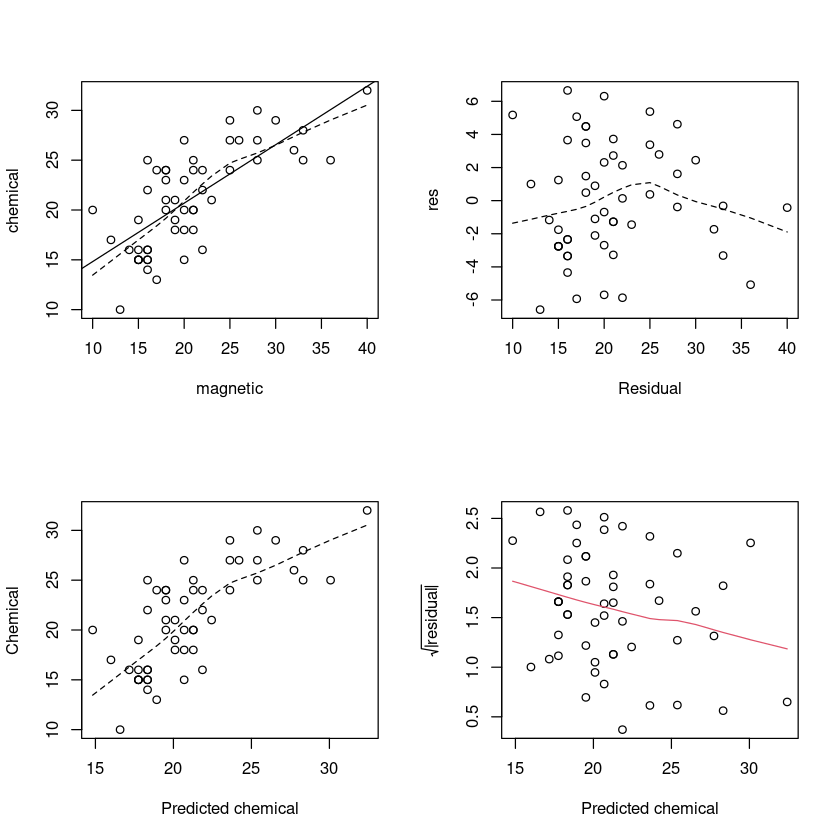

In [30]:
par(mfrow=c(2,2))

## Panel A: chemical vs magnetic (Data frame ironslag from DAAG)
plot(chemical ~ magnetic, data=ironslag)
ironslag.lm <- lm(chemical ~ magnetic, data=ironslag)
abline(ironslag.lm)
with(ironslag, lines(lowess(chemical ~ magnetic, f=.9), lty=2))

## Panel B: Residuals from straight line fit, vs magnetic
# lm() fits a linear model, while residuals() extracts the
# residuals of the input model (a linear model in this case)
res <- residuals(ironslag.lm)
plot(res ~ magnetic, xlab="Residual", data=ironslag)
# Here the lowess() performs the LOWESS smoothing on the input curve
# The parameter "f" is the smoother span.
# This gives the proportion of points in the plot which influence
# the smooth at each value. Larger values give more smoothness.
with(ironslag, lines(lowess(res ~ magnetic, f=.9), lty=2))

## Panel C: Observed vs predicted
yhat <- fitted(ironslag.lm)
plot(chemical ~ yhat, data=ironslag, xlab="Predicted chemical", ylab="Chemical")
with(ironslag, lines(lowess(chemical ~ yhat, f=.9), lty=2))

## Panel D: Check whether error variance seems constant
# Calculates the sqrt of the abs value of the residuals
sqrtabs <- sqrt(abs(res))
plot(sqrtabs ~ yhat, data=ironslag, xlab = "Predicted chemical",
ylab = expression(sqrt(abs(residual))), type = "n")
panel.smooth(yhat, sqrtabs, span = 0.95)  # Simple panel plot